In [1]:
import pandas as pd
pd.set_option("max_columns",None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**Time-series** variables are populated by values which are specific to a point in time. Time is linear and infinitely 
fine-grained, so really time-series values are a kind of special case of interval variables.

In [2]:
stocks=pd.read_csv("/home/saumitra/Desktop/kaggle/prices.csv",parse_dates=['date'])

In [3]:
stocks.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
stocks=stocks[stocks['symbol'] == 'GOOG'].set_index('date')

In [5]:
stocks.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,GOOG,626.951088,626.751061,624.241073,629.511067,3927000.0
2010-01-05,GOOG,627.181073,623.991055,621.541045,627.841071,6031900.0
2010-01-06,GOOG,625.861078,608.261023,606.361042,625.861078,7987100.0
2010-01-07,GOOG,609.401025,594.101005,592.651008,610.001045,12876600.0
2010-01-08,GOOG,592.000997,602.021036,589.110988,603.251034,9483900.0


In the "weak case", dates act as timestamps: they tell us something about when an observation occurred. 
For example, in the following dataset of animal shelter outcomes, there are two columns, `datetime` and 
`date_of_birth`, which describe facts about the animal in the observation.

In [6]:
shelter_outcomes=pd.read_csv("/home/saumitra/Desktop/kaggle/aac_shelter_outcomes.csv",
                             parse_dates=['date_of_birth','datetime'])
shelter_outcomes = shelter_outcomes[
    ['outcome_type', 'age_upon_outcome', 'datetime', 'animal_type', 'breed', 
     'color', 'sex_upon_outcome', 'date_of_birth']
]
shelter_outcomes.head()

,outcome_type,age_upon_outcome,datetime,animal_type,breed,color,sex_upon_outcome,date_of_birth
0,Transfer,2 weeks,2014-07-22 16:04:00,Cat,Domestic Shorthair Mix,Orange Tabby,Intact Male,2014-07-07
1,Transfer,1 year,2013-11-07 11:47:00,Dog,Beagle Mix,White/Brown,Spayed Female,2012-11-06
2,Adoption,1 year,2014-06-03 14:20:00,Dog,Pit Bull,Blue/White,Neutered Male,2013-03-31
3,Transfer,9 years,2014-06-15 15:50:00,Dog,Miniature Schnauzer Mix,White,Neutered Male,2005-06-02
4,Euthanasia,5 months,2014-07-07 14:04:00,Other,Bat Mix,Brown,Unknown,2014-01-07


**Here's a line plot visualizing which birth dates are the most common in the dataset.**

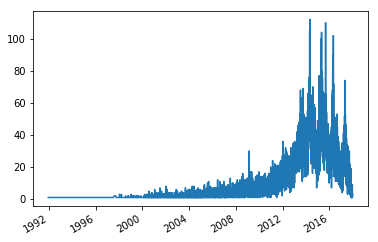

In [13]:
shelter_outcomes['date_of_birth'].value_counts().sort_values().plot.line()

It looks like birth dates for the animals in the dataset peak at around 2015, but it's hard to tell for sure 
because the data is rather noisy.

Currently the data is by day, but what if we globbed all the dates together into years? This is known as 
**resampling**. We can do this to tweak the dataset, generating a result that's aggregated by year. The method for 
doing this in `pandas`, `resample`, is pretty simple. There are lots of potential resampling options: we'll use 
`Y`, which is short for "year".

Notice that `pandas` is automatically adapting the labels on the x-axis to match our output type. This is because 
pandas` is "datetime-aware"; it knows that when we have data points spaced out one year apart from one another, we 
only want to see the years in the labels, and nothing else!

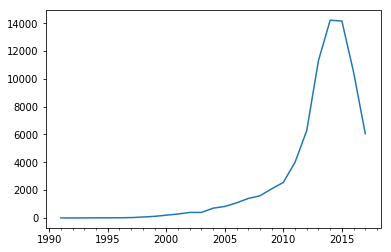

In [14]:
shelter_outcomes['date_of_birth'].value_counts().resample('Y').sum().plot.line()

**Here's a similar simple bar chart which looks at the trade volume of the `GOOG` stock:**

In [7]:
stocks['volume'].resample('Y').mean().plot.bar()

# Lag plot
One of these plot types is the lag plot. A lag plot compares data points from each observation in the dataset 
against data points from a previous observation. So for example, data from December 21st will be compared with 
data from December 20th, which will in turn be compared with data from December 19th, and so on.
Lag plots are extremely useful because they are a simple way of checking datasets for this kind of periodicity.

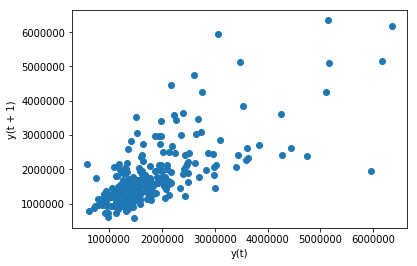

In [8]:
from pandas.plotting import lag_plot
lag_plot(stocks['volume'].tail(250))

# Autocorrelation plot
3A plot type that takes this concept and goes even further with it is the autocorrelation plot. The autocorrelation
plot is a multivariate summarization-type plot that lets you check *every* periodicity at the same time. It does 
this by computing a summary statistic&mdash;the correlation score&mdash;across every possible lag in the dataset. 
This is known as autocorrelation.

In an autocorrelation plot the lag is on the x-axis and the autocorrelation score is on the y-axis. The farther 
away the autocorrelation is from 0, the greater the influence that records that far away from each other exert on 
one another.

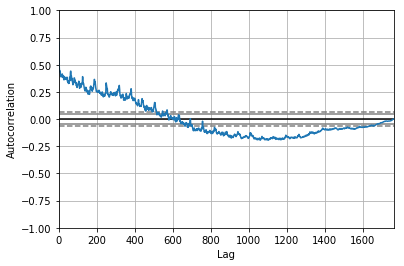

In [9]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(stocks['volume'])

In [10]:
crypto=pd.read_csv("/home/saumitra/Desktop/kaggle/crypto-markets.csv")
crypto.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


In [11]:
crypto=crypto[crypto['name'] == 'Bitcoin']
crypto['date'] = pd.to_datetime(crypto['date'])
crypto.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


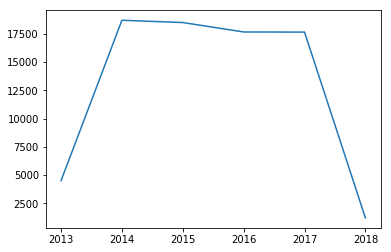

In [12]:
shelter_outcomes['datetime'].value_counts().resample('Y').sum().plot.line()

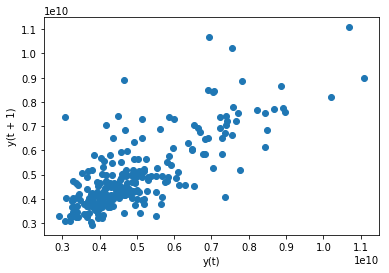

In [13]:
lag_plot(crypto['volume'].tail(250))

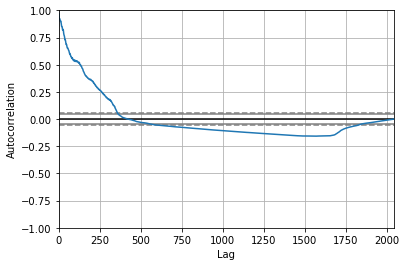

In [14]:
autocorrelation_plot(crypto['volume'])


Lag is the time-difference for each observation in the dataset. Autocorrelation is correlation applied to lag